In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

D:\anaconda\envs\example_env\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\envs\example_env\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
D:\anaconda\envs\example_env\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\anaconda\envs\example_env\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)
D:\anaconda\envs\example_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Answer

### Question 1

#### (a) After 1080 epoch to reach accurace =1

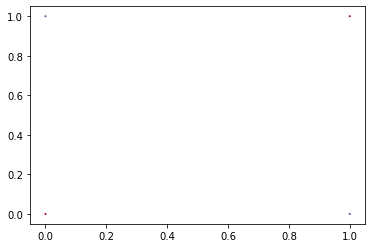

D:\anaconda\envs\example_env\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 Loss  0.7049422860145569
Training accuracy is  0.5
Epoch  10 Loss  0.7001311779022217
Training accuracy is  0.5
Epoch  20 Loss  0.6951521635055542
Training accuracy is  0.5
Epoch  30 Loss  0.6933895945549011
Training accuracy is  0.5
Epoch  40 Loss  0.6931244134902954
Training accuracy is  0.5
Epoch  50 Loss  0.6931405067443848
Training accuracy is  0.5
Epoch  60 Loss  0.6931229829788208
Training accuracy is  0.5
Epoch  70 Loss  0.6930912137031555
Training accuracy is  0.5
Epoch  80 Loss  0.6930682063102722
Training accuracy is  0.5
Epoch  90 Loss  0.6930526494979858
Training accuracy is  0.75
Epoch  100 Loss  0.6930404901504517
Training accuracy is  0.75
Epoch  110 Loss  0.6930286884307861
Training accuracy is  0.75
Epoch  120 Loss  0.693016767501831
Training accuracy is  0.75
Epoch  130 Loss  0.6930046081542969
Training accuracy is  0.5
Epoch  140 Loss  0.6929952502250671
Training accuracy is  0.5
Epoch  150 Loss  0.6929852366447449
Training accuracy is  0.5
Epoch  160 Loss 

In [4]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 20)
        self.fc5 = nn.Linear(20, 20)
        self.fc6 = nn.Linear(20, 20)
        self.fc7 = nn.Linear(20, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.fc7(x)
        return F.log_softmax(x)
        #return F.softmax(x)
    #%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()
        
def plot_decision_boundary(clf, X, y, filename):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()

#%% read data

data=pd.DataFrame(data={"x1":[0,0,1,1],"x2":[0,1,0,1],"y":[0,1,1,0]})
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

#plot_data(X,y,'data.pdf')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
plt.show()

#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# nepochs = 10000
#nepochs = 3000 #10000
nepochs = 3000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    # backpropagate
    loss.backward()
    
    # update parameters
    optimizer.step()
    # print out report
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
# adding stop condition as soon as the accuracy reach 1
        if accuracy ==1:
            break

In [5]:
#%%  plot outputs
plot_decision_boundary(net, X, y, 'Results0.0001.pdf')
plot_decision_boundary(net, X[correctidx,:], y[correctidx], 'Correct.pdf')
plot_decision_boundary(net, X[~correctidx,:], y[~correctidx], 'Inorrect.pdf')


D:\anaconda\envs\example_env\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
D:\anaconda\envs\example_env\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
D:\anaconda\envs\example_env\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


#### (b) After 3100 epoch, the loss fall below 1*10^-4


In [6]:
#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# nepochs = 10000
#nepochs = 3000 #10000
nepochs = 5000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    # backpropagate
    loss.backward()
    
    # update parameters
    optimizer.step()
    # print out report
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
# adding stop condition as soon as the accuracy reach 1
        if loss.item()<0.0001:
            break

D:\anaconda\envs\example_env\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 Loss  0.6980985403060913
Training accuracy is  0.5
Epoch  10 Loss  0.6956726908683777
Training accuracy is  0.5
Epoch  20 Loss  0.6935121417045593
Training accuracy is  0.5
Epoch  30 Loss  0.6929730772972107
Training accuracy is  0.5
Epoch  40 Loss  0.6929244995117188
Training accuracy is  0.5
Epoch  50 Loss  0.6928489804267883
Training accuracy is  0.5
Epoch  60 Loss  0.6927491426467896
Training accuracy is  0.5
Epoch  70 Loss  0.6926646828651428
Training accuracy is  0.5
Epoch  80 Loss  0.6925920248031616
Training accuracy is  0.5
Epoch  90 Loss  0.6925411820411682
Training accuracy is  0.5
Epoch  100 Loss  0.6924867630004883
Training accuracy is  0.5
Epoch  110 Loss  0.6924335956573486
Training accuracy is  0.5
Epoch  120 Loss  0.6923801898956299
Training accuracy is  0.5
Epoch  130 Loss  0.6923214197158813
Training accuracy is  0.5
Epoch  140 Loss  0.6922513246536255
Training accuracy is  0.5
Epoch  150 Loss  0.6921745538711548
Training accuracy is  0.5
Epoch  160 Loss  0.

Training accuracy is  1.0
Epoch  1350 Loss  0.000675295596010983
Training accuracy is  1.0
Epoch  1360 Loss  0.0006603218498639762
Training accuracy is  1.0
Epoch  1370 Loss  0.0006459432188421488
Training accuracy is  1.0
Epoch  1380 Loss  0.0006320703541859984
Training accuracy is  1.0
Epoch  1390 Loss  0.0006186733953654766
Training accuracy is  1.0
Epoch  1400 Loss  0.0006057228310965002
Training accuracy is  1.0
Epoch  1410 Loss  0.0005932482308708131
Training accuracy is  1.0
Epoch  1420 Loss  0.0005811604205518961
Training accuracy is  1.0
Epoch  1430 Loss  0.0005694893188774586
Training accuracy is  1.0
Epoch  1440 Loss  0.0005582347512245178
Training accuracy is  1.0
Epoch  1450 Loss  0.0005473074270412326
Training accuracy is  1.0
Epoch  1460 Loss  0.0005367670091800392
Training accuracy is  1.0
Epoch  1470 Loss  0.0005264944047667086
Training accuracy is  1.0
Epoch  1480 Loss  0.0005165789043530822
Training accuracy is  1.0
Epoch  1490 Loss  0.0005069610197097063
Training ac

Training accuracy is  1.0
Epoch  2660 Loss  0.00013382740144152194
Training accuracy is  1.0
Epoch  2670 Loss  0.00013284414308145642
Training accuracy is  1.0
Epoch  2680 Loss  0.00013186087016947567
Training accuracy is  1.0
Epoch  2690 Loss  0.00013093720190227032
Training accuracy is  1.0
Epoch  2700 Loss  0.00012998373131267726
Training accuracy is  1.0
Epoch  2710 Loss  0.0001290600630454719
Training accuracy is  1.0
Epoch  2720 Loss  0.00012813639477826655
Training accuracy is  1.0
Epoch  2730 Loss  0.00012721271195914596
Training accuracy is  1.0
Epoch  2740 Loss  0.00012631883146241307
Training accuracy is  1.0
Epoch  2750 Loss  0.00012545473873615265
Training accuracy is  1.0
Epoch  2760 Loss  0.00012456085823941976
Training accuracy is  1.0
Epoch  2770 Loss  0.00012366696319077164
Training accuracy is  1.0
Epoch  2780 Loss  0.00012286248966120183
Training accuracy is  1.0
Epoch  2790 Loss  0.0001219685873365961
Training accuracy is  1.0
Epoch  2800 Loss  0.000121164091979153

In [7]:
#%%  plot outputs
plot_decision_boundary(net, X, y, 'Results0.0001.pdf')
plot_decision_boundary(net, X[correctidx,:], y[correctidx], 'Correct.pdf')
plot_decision_boundary(net, X[~correctidx,:], y[~correctidx], 'Inorrect.pdf')


D:\anaconda\envs\example_env\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
D:\anaconda\envs\example_env\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
D:\anaconda\envs\example_env\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


#### (c) 1 hidden layer 3 node

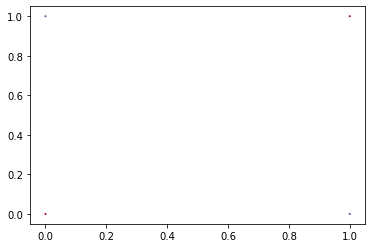

In [8]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc7 = nn.Linear(3, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc7(x)
        return F.log_softmax(x)
        #return F.softmax(x)
    #%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()
        
def plot_decision_boundary(clf, X, y, filename):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()

#%% read data

data=pd.DataFrame(data={"x1":[0,0,1,1],"x2":[0,1,0,1],"y":[0,1,1,0]})
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

#plot_data(X,y,'data.pdf')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
plt.show()


In [12]:
#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# nepochs = 10000
#nepochs = 3000 #10000
nepochs = 10000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    # backpropagate
    loss.backward()
    
    # update parameters
    optimizer.step()
    # print out report
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
# adding stop condition as soon as the accuracy reach 1
        if accuracy ==1:
            break

Epoch  0 Loss  0.7479711174964905
Training accuracy is  0.5
Epoch  10 Loss  0.69833904504776
Training accuracy is  0.5
Epoch  20 Loss  0.6668489575386047
Training accuracy is  0.5
Epoch  30 Loss  0.6624796986579895
Training accuracy is  0.5
Epoch  40 Loss  0.6531241536140442
Training accuracy is  0.75
Epoch  50 Loss  0.6436635851860046
Training accuracy is  0.5
Epoch  60 Loss  0.6335506439208984
Training accuracy is  0.5
Epoch  70 Loss  0.6227771043777466
Training accuracy is  0.5
Epoch  80 Loss  0.6111659407615662
Training accuracy is  0.75
Epoch  90 Loss  0.5982900261878967
Training accuracy is  0.75
Epoch  100 Loss  0.5865616202354431
Training accuracy is  0.75
Epoch  110 Loss  0.5752888321876526
Training accuracy is  0.75
Epoch  120 Loss  0.5642483234405518
Training accuracy is  0.75
Epoch  130 Loss  0.5536409020423889
Training accuracy is  0.75
Epoch  140 Loss  0.5431841015815735
Training accuracy is  0.75
Epoch  150 Loss  0.5332648158073425
Training accuracy is  0.75
Epoch  160 L

D:\anaconda\envs\example_env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


### Question 2

#### (a)

In [14]:
data= pd.read_csv("Feedforward_Data_ellipse.csv", header=None)

In [15]:
data.columns=["x1","x2","y"]

In [16]:
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)


In [17]:
accuracy_l=[]
loss_l=[]
par=[]

In [99]:
# don't run this block
#h_1=range(2,10)
#h_2=range(2,10)
#h_3=range(2,10)
#parameters =list(product(h_1,h_2,h_3))

In [18]:
parameters=[[80,80]]

In [29]:
for i in parameters:
    par.append(i)
    class Net(nn.Module):

        def __init__(self):
            super(Net, self).__init__()
            self.fc1 = nn.Linear(2, i[0])
            self.fc2 = nn.Linear(i[0], i[1])
            self.fc7 = nn.Linear(i[1], 2)

        def forward(self, x):
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc7(x)
            return F.log_softmax(x)
            #return F.softmax(x)
        #%% plot function

    def plot_data(X, y, filename):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
        plt.savefig(filename)
        plt.close()

    def plot_decision_boundary(clf, X, y, filename):
        # Set min and max values and give it some padding
        #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        x_min, x_max = -1, 1
        y_min, y_max = -1, 1
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
        Z = X_out.data.max(1)[1]
        # Z.shape
        Z = Z.reshape(xx.shape)
        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
        plt.savefig(filename)
        plt.close()
    #%% train
    net = Net()

    # create a stochastic gradient descent optimizer
    learning_rate = .01
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

    # create a loss function
    #criterion = nn.CrossEntropyLoss()
    criterion = nn.NLLLoss()

    # nepochs = 10000
    #nepochs = 3000 #10000
    nepochs = 15000
    data, target = X, y
    # run the main training loop
    best=0
    best_l=0
    for epoch in range(nepochs):
    #    adjust learning rate if desired
        if epoch % 3000 == 0 and epoch <= 24000:
            for g in optimizer.param_groups:
                   g['lr'] = g['lr']/2
        optimizer.zero_grad()
        # forward propagate
        net_out = net(data)
        # compute loss
        loss = criterion(net_out, target)
        # backpropagate
        loss.backward()

        # update parameters
        optimizer.step()
        # print out report
        if epoch % 10 == 0:
            print('Epoch ', epoch, 'Loss ', loss.item())
            net_out = net(data)
            pred = net_out.data.max(1)[1]  # get the index of the max log-probability
            correctidx = pred.eq(target.data) 
            ncorrect = correctidx.sum()
            accuracy = ncorrect.item()/len(data)
            print('Training accuracy is ', accuracy)
            if epoch>13000 and accuracy-0.001>best:
                best=accuracy
                best_l=loss.item()
                torch.save(net, './question2a.01LR1610Epochs')

            
    accuracy_l.append(accuracy)
    loss_l.append(loss.item())

D:\anaconda\envs\example_env\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Epoch  0 Loss  0.6997531056404114
Training accuracy is  0.67578125
Epoch  10 Loss  0.49385643005371094
Training accuracy is  0.8325570913461539
Epoch  20 Loss  0.2842622995376587
Training accuracy is  0.8558443509615384
Epoch  30 Loss  0.2167314887046814
Training accuracy is  0.8916766826923077
Epoch  40 Loss  0.20396128296852112
Training accuracy is  0.9016676682692307
Epoch  50 Loss  0.2005247324705124
Training accuracy is  0.8979116586538461
Epoch  60 Loss  0.19889654219150543
Training accuracy is  0.8991135817307693
Epoch  70 Loss  0.19797363877296448
Training accuracy is  0.8982872596153846
Epoch  80 Loss  0.19709110260009766
Training accuracy is  0.8984375
Epoch  90 Loss  0.1965232491493225
Training accuracy is  0.8985126201923077
Epoch  100 Loss  0.1960477977991104
Training accuracy is  0.8985877403846154
Epoch  110 Loss  0.19567669928073883
Training accuracy is  0.8989633413461539
Epoch  120 Loss  0.1963711827993393
Training accuracy is  0.8991887019230769
Epoch  130 Loss  0.19

Epoch  1070 Loss  0.18575024604797363
Training accuracy is  0.9006911057692307
Epoch  1080 Loss  0.18532679975032806
Training accuracy is  0.900390625
Epoch  1090 Loss  0.18423308432102203
Training accuracy is  0.9006911057692307
Epoch  1100 Loss  0.19052754342556
Training accuracy is  0.9084284855769231
Epoch  1110 Loss  0.18691636621952057
Training accuracy is  0.9000150240384616
Epoch  1120 Loss  0.18605579435825348
Training accuracy is  0.9009915865384616
Epoch  1130 Loss  0.18455770611763
Training accuracy is  0.9003155048076923
Epoch  1140 Loss  0.18486692011356354
Training accuracy is  0.900390625
Epoch  1150 Loss  0.1858372539281845
Training accuracy is  0.9002403846153846
Epoch  1160 Loss  0.18459166586399078
Training accuracy is  0.9005408653846154
Epoch  1170 Loss  0.18525372445583344
Training accuracy is  0.9012169471153846
Epoch  1180 Loss  0.18469016253948212
Training accuracy is  0.9008413461538461
Epoch  1190 Loss  0.18548597395420074
Training accuracy is  0.90024038461

Epoch  2140 Loss  0.17379529774188995
Training accuracy is  0.9027193509615384
Epoch  2150 Loss  0.18987873196601868
Training accuracy is  0.9516977163461539
Epoch  2160 Loss  0.17339619994163513
Training accuracy is  0.9014423076923077
Epoch  2170 Loss  0.17593011260032654
Training accuracy is  0.9007662259615384
Epoch  2180 Loss  0.17401543259620667
Training accuracy is  0.9009915865384616
Epoch  2190 Loss  0.18079319596290588
Training accuracy is  0.9501953125
Epoch  2200 Loss  0.17340177297592163
Training accuracy is  0.90234375
Epoch  2210 Loss  0.1731460839509964
Training accuracy is  0.9009164663461539
Epoch  2220 Loss  0.18133462965488434
Training accuracy is  0.9007662259615384
Epoch  2230 Loss  0.1728476583957672
Training accuracy is  0.9027193509615384
Epoch  2240 Loss  0.18638035655021667
Training accuracy is  0.9302133413461539
Epoch  2250 Loss  0.1726749837398529
Training accuracy is  0.9012169471153846
Epoch  2260 Loss  0.18708902597427368
Training accuracy is  0.9006911

Epoch  3190 Loss  0.16345348954200745
Training accuracy is  0.9050480769230769
Epoch  3200 Loss  0.16335047781467438
Training accuracy is  0.9051231971153846
Epoch  3210 Loss  0.16324934363365173
Training accuracy is  0.9051983173076923
Epoch  3220 Loss  0.16314846277236938
Training accuracy is  0.9052734375
Epoch  3230 Loss  0.16304650902748108
Training accuracy is  0.9052734375
Epoch  3240 Loss  0.16294516623020172
Training accuracy is  0.9052734375
Epoch  3250 Loss  0.16284415125846863
Training accuracy is  0.9053485576923077
Epoch  3260 Loss  0.16274197399616241
Training accuracy is  0.9054987980769231
Epoch  3270 Loss  0.16263970732688904
Training accuracy is  0.9054987980769231
Epoch  3280 Loss  0.16253754496574402
Training accuracy is  0.9055739182692307
Epoch  3290 Loss  0.1624351143836975
Training accuracy is  0.9055739182692307
Epoch  3300 Loss  0.16233213245868683
Training accuracy is  0.9055739182692307
Epoch  3310 Loss  0.16222865879535675
Training accuracy is  0.905573918

Epoch  4250 Loss  0.16146515309810638
Training accuracy is  0.9680739182692307
Epoch  4260 Loss  0.15255852043628693
Training accuracy is  0.9154897836538461
Epoch  4270 Loss  0.15931569039821625
Training accuracy is  0.9013671875
Epoch  4280 Loss  0.15269966423511505
Training accuracy is  0.9100060096153846
Epoch  4290 Loss  0.1519550383090973
Training accuracy is  0.9124849759615384
Epoch  4300 Loss  0.15469162166118622
Training accuracy is  0.9027944711538461
Epoch  4310 Loss  0.1526883989572525
Training accuracy is  0.9106069711538461
Epoch  4320 Loss  0.15921901166439056
Training accuracy is  0.9701772836538461
Epoch  4330 Loss  0.15222761034965515
Training accuracy is  0.9266826923076923
Epoch  4340 Loss  0.15139266848564148
Training accuracy is  0.9124849759615384
Epoch  4350 Loss  0.15793929994106293
Training accuracy is  0.9013671875
Epoch  4360 Loss  0.15154635906219482
Training accuracy is  0.9131610576923077
Epoch  4370 Loss  0.15654468536376953
Training accuracy is  0.9685

Epoch  5300 Loss  0.14903105795383453
Training accuracy is  0.9723557692307693
Epoch  5310 Loss  0.14547017216682434
Training accuracy is  0.9658954326923077
Epoch  5320 Loss  0.1479460448026657
Training accuracy is  0.9725060096153846
Epoch  5330 Loss  0.14606308937072754
Training accuracy is  0.9679987980769231
Epoch  5340 Loss  0.14714881777763367
Training accuracy is  0.9717548076923077
Epoch  5350 Loss  0.14628730714321136
Training accuracy is  0.9682241586538461
Epoch  5360 Loss  0.14649496972560883
Training accuracy is  0.9710036057692307
Epoch  5370 Loss  0.14660970866680145
Training accuracy is  0.9674729567307693
Epoch  5380 Loss  0.14492812752723694
Training accuracy is  0.9649188701923077
Epoch  5390 Loss  0.14982818067073822
Training accuracy is  0.9701021634615384
Epoch  5400 Loss  0.1450268179178238
Training accuracy is  0.9665715144230769
Epoch  5410 Loss  0.14835377037525177
Training accuracy is  0.9722055288461539
Epoch  5420 Loss  0.1449197679758072
Training accuracy

Epoch  6350 Loss  0.13266628980636597
Training accuracy is  0.9468900240384616
Epoch  6360 Loss  0.13259828090667725
Training accuracy is  0.9468900240384616
Epoch  6370 Loss  0.13253025710582733
Training accuracy is  0.9468900240384616
Epoch  6380 Loss  0.13246110081672668
Training accuracy is  0.9470402644230769
Epoch  6390 Loss  0.13239175081253052
Training accuracy is  0.9473407451923077
Epoch  6400 Loss  0.1323191225528717
Training accuracy is  0.947265625
Epoch  6410 Loss  0.13224568963050842
Training accuracy is  0.947265625
Epoch  6420 Loss  0.13216683268547058
Training accuracy is  0.9475661057692307
Epoch  6430 Loss  0.1320737898349762
Training accuracy is  0.9477914663461539
Epoch  6440 Loss  0.1320020705461502
Training accuracy is  0.9477914663461539
Epoch  6450 Loss  0.13193045556545258
Training accuracy is  0.9480919471153846
Epoch  6460 Loss  0.13185879588127136
Training accuracy is  0.9482421875
Epoch  6470 Loss  0.13178755342960358
Training accuracy is  0.9482421875
Ep

Epoch  7400 Loss  0.12544550001621246
Training accuracy is  0.9414813701923077
Epoch  7410 Loss  0.12408927828073502
Training accuracy is  0.9625901442307693
Epoch  7420 Loss  0.128147155046463
Training accuracy is  0.9779146634615384
Epoch  7430 Loss  0.12548524141311646
Training accuracy is  0.9664963942307693
Epoch  7440 Loss  0.1258872151374817
Training accuracy is  0.9332181490384616
Epoch  7450 Loss  0.12557870149612427
Training accuracy is  0.9379507211538461
Epoch  7460 Loss  0.12371312081813812
Training accuracy is  0.9527493990384616
Epoch  7470 Loss  0.12353284657001495
Training accuracy is  0.9542518028846154
Epoch  7480 Loss  0.12817834317684174
Training accuracy is  0.9157151442307693
Epoch  7490 Loss  0.12340085953474045
Training accuracy is  0.9654447115384616
Epoch  7500 Loss  0.12637749314308167
Training accuracy is  0.9744591346153846
Epoch  7510 Loss  0.12401736527681351
Training accuracy is  0.9422325721153846
Epoch  7520 Loss  0.1259302943944931
Training accuracy 

Epoch  8450 Loss  0.12032942473888397
Training accuracy is  0.9779897836538461
Epoch  8460 Loss  0.11739163845777512
Training accuracy is  0.9437349759615384
Epoch  8470 Loss  0.1192476749420166
Training accuracy is  0.9401292067307693
Epoch  8480 Loss  0.11589838564395905
Training accuracy is  0.9602614182692307
Epoch  8490 Loss  0.11568310856819153
Training accuracy is  0.9617638221153846
Epoch  8500 Loss  0.12005852162837982
Training accuracy is  0.927734375
Epoch  8510 Loss  0.11599746346473694
Training accuracy is  0.9628155048076923
Epoch  8520 Loss  0.12107685208320618
Training accuracy is  0.9795673076923077
Epoch  8530 Loss  0.11572591960430145
Training accuracy is  0.970703125
Epoch  8540 Loss  0.1153932735323906
Training accuracy is  0.9597355769230769
Epoch  8550 Loss  0.12123281508684158
Training accuracy is  0.9250300480769231
Epoch  8560 Loss  0.11539141833782196
Training accuracy is  0.9643179086538461
Epoch  8570 Loss  0.11931682378053665
Training accuracy is  0.979792

Epoch  9510 Loss  0.10982035845518112
Training accuracy is  0.9692758413461539
Epoch  9520 Loss  0.10977636277675629
Training accuracy is  0.9692758413461539
Epoch  9530 Loss  0.10973214358091354
Training accuracy is  0.9692758413461539
Epoch  9540 Loss  0.1096877008676529
Training accuracy is  0.9692758413461539
Epoch  9550 Loss  0.10964316874742508
Training accuracy is  0.9692758413461539
Epoch  9560 Loss  0.10959725081920624
Training accuracy is  0.9692758413461539
Epoch  9570 Loss  0.10955169796943665
Training accuracy is  0.9692758413461539
Epoch  9580 Loss  0.10950624197721481
Training accuracy is  0.9692758413461539
Epoch  9590 Loss  0.10945975035429001
Training accuracy is  0.9692758413461539
Epoch  9600 Loss  0.10941056162118912
Training accuracy is  0.9691256009615384
Epoch  9610 Loss  0.10935436189174652
Training accuracy is  0.9691256009615384
Epoch  9620 Loss  0.10930125415325165
Training accuracy is  0.9690504807692307
Epoch  9630 Loss  0.10925500094890594
Training accura

Epoch  10550 Loss  0.1048569604754448
Training accuracy is  0.9753605769230769
Epoch  10560 Loss  0.1054643914103508
Training accuracy is  0.9790414663461539
Epoch  10570 Loss  0.107790507376194
Training accuracy is  0.9806941105769231
Epoch  10580 Loss  0.10523198544979095
Training accuracy is  0.9633413461538461
Epoch  10590 Loss  0.10468325018882751
Training accuracy is  0.9700270432692307
Epoch  10600 Loss  0.10469897091388702
Training accuracy is  0.9770132211538461
Epoch  10610 Loss  0.10569688677787781
Training accuracy is  0.9800180288461539
Epoch  10620 Loss  0.10513830929994583
Training accuracy is  0.9775390625
Epoch  10630 Loss  0.10437305271625519
Training accuracy is  0.9699519230769231
Epoch  10640 Loss  0.10531996190547943
Training accuracy is  0.9603365384615384
Epoch  10650 Loss  0.10546059906482697
Training accuracy is  0.9629657451923077
Epoch  10660 Loss  0.10431548207998276
Training accuracy is  0.9762620192307693
Epoch  10670 Loss  0.10528551042079926
Training ac

Epoch  11600 Loss  0.10084231197834015
Training accuracy is  0.9800180288461539
Epoch  11610 Loss  0.09996572136878967
Training accuracy is  0.9778395432692307
Epoch  11620 Loss  0.09940969944000244
Training accuracy is  0.9736328125
Epoch  11630 Loss  0.10013513267040253
Training accuracy is  0.9660456730769231
Epoch  11640 Loss  0.10211639106273651
Training accuracy is  0.9612379807692307
Epoch  11650 Loss  0.10002139955759048
Training accuracy is  0.9799429086538461
Epoch  11660 Loss  0.09946271777153015
Training accuracy is  0.9774639423076923
Epoch  11670 Loss  0.09930532425642014
Training accuracy is  0.9716045673076923
Epoch  11680 Loss  0.10048273205757141
Training accuracy is  0.9640174278846154
Epoch  11690 Loss  0.10001159459352493
Training accuracy is  0.9685246394230769
Epoch  11700 Loss  0.0991966649889946
Training accuracy is  0.9780649038461539
Epoch  11710 Loss  0.10046584159135818
Training accuracy is  0.9805438701923077
Epoch  11720 Loss  0.09952804446220398
Training

Epoch  12630 Loss  0.09600213170051575
Training accuracy is  0.9762620192307693
Epoch  12640 Loss  0.09597491472959518
Training accuracy is  0.9762620192307693
Epoch  12650 Loss  0.09594763815402985
Training accuracy is  0.9762620192307693
Epoch  12660 Loss  0.09592049568891525
Training accuracy is  0.9763371394230769
Epoch  12670 Loss  0.09589305520057678
Training accuracy is  0.9762620192307693
Epoch  12680 Loss  0.09586568921804428
Training accuracy is  0.9762620192307693
Epoch  12690 Loss  0.09583832323551178
Training accuracy is  0.9763371394230769
Epoch  12700 Loss  0.09581077098846436
Training accuracy is  0.9763371394230769
Epoch  12710 Loss  0.09578314423561096
Training accuracy is  0.9763371394230769
Epoch  12720 Loss  0.09575565159320831
Training accuracy is  0.9763371394230769
Epoch  12730 Loss  0.0957278162240982
Training accuracy is  0.9762620192307693
Epoch  12740 Loss  0.09570018202066422
Training accuracy is  0.9763371394230769
Epoch  12750 Loss  0.09567231684923172
Tr

Epoch  13680 Loss  0.0933842733502388
Training accuracy is  0.9807692307692307
Epoch  13690 Loss  0.09285710752010345
Training accuracy is  0.9763371394230769
Epoch  13700 Loss  0.09311450272798538
Training accuracy is  0.9747596153846154
Epoch  13710 Loss  0.09283939749002457
Training accuracy is  0.9764122596153846
Epoch  13720 Loss  0.09276214241981506
Training accuracy is  0.978515625
Epoch  13730 Loss  0.09327168762683868
Training accuracy is  0.9808443509615384
Epoch  13740 Loss  0.09303589910268784
Training accuracy is  0.9797175480769231
Epoch  13750 Loss  0.09294497966766357
Training accuracy is  0.9749098557692307
Epoch  13760 Loss  0.09262848645448685
Training accuracy is  0.9776893028846154
Epoch  13770 Loss  0.09271685779094696
Training accuracy is  0.9793419471153846
Epoch  13780 Loss  0.09285442531108856
Training accuracy is  0.9802433894230769
Epoch  13790 Loss  0.09264950454235077
Training accuracy is  0.9788912259615384
Epoch  13800 Loss  0.09248673170804977
Training 

Epoch  14720 Loss  0.08989235758781433
Training accuracy is  0.9761117788461539
Epoch  14730 Loss  0.08968368917703629
Training accuracy is  0.9782151442307693
Epoch  14740 Loss  0.08970840275287628
Training accuracy is  0.9805438701923077
Epoch  14750 Loss  0.08993847668170929
Training accuracy is  0.9809945913461539
Epoch  14760 Loss  0.08983039110898972
Training accuracy is  0.9808443509615384
Epoch  14770 Loss  0.08953411132097244
Training accuracy is  0.9785907451923077
Epoch  14780 Loss  0.08971136063337326
Training accuracy is  0.9760366586538461
Epoch  14790 Loss  0.09055217355489731
Training accuracy is  0.9728816105769231
Epoch  14800 Loss  0.08955739438533783
Training accuracy is  0.9808443509615384
Epoch  14810 Loss  0.08950796723365784
Training accuracy is  0.9800931490384616
Epoch  14820 Loss  0.08946161717176437
Training accuracy is  0.9775390625
Epoch  14830 Loss  0.08960187435150146
Training accuracy is  0.9761117788461539
Epoch  14840 Loss  0.08964286744594574
Trainin

In [30]:
# accuracy
print(best)

0.9825721153846154


In [31]:
# loss
print(best_l)

0.09010953456163406


In [32]:
net1 = torch.load('./question2a.01LR1610Epochs')
plot_decision_boundary(net1, X, y, 'Results0.0001.pdf')

D:\anaconda\envs\example_env\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


D:\anaconda\envs\example_env\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Training accuracy is  0.9825721153846154


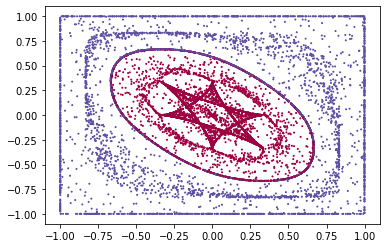

In [33]:
net_out = net1(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=plt.cm.Spectral, s = 1)
plt.show()

#### (b) 

In [34]:
data= pd.read_csv("Feedforward_Data_hexa.csv", header=None)

In [35]:
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

In [36]:
parameters=[[80,100]]

In [44]:
for i in parameters:
    par.append(i)
    class Net(nn.Module):

        def __init__(self):
            super(Net, self).__init__()
            self.fc1 = nn.Linear(2, i[0])
            self.fc2 = nn.Linear(i[0], i[1])

            self.fc7 = nn.Linear(i[1], 2)

        def forward(self, x):
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc7(x)
            return F.log_softmax(x)
            #return F.softmax(x)
        #%% plot function

    def plot_data(X, y, filename):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
        plt.savefig(filename)
        plt.close()

    def plot_decision_boundary(clf, X, y, filename):
        # Set min and max values and give it some padding
        #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        x_min, x_max = -1, 1
        y_min, y_max = -1, 1
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
        Z = X_out.data.max(1)[1]
        # Z.shape
        Z = Z.reshape(xx.shape)
        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
        plt.savefig(filename)
        plt.close()
    #%% train
    net = Net()

    # create a stochastic gradient descent optimizer
    learning_rate = .01
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

    # create a loss function
    #criterion = nn.CrossEntropyLoss()
    criterion = nn.NLLLoss()

    # nepochs = 10000
    #nepochs = 3000 #10000
    nepochs = 17000
    data, target = X, y
    # run the main training loop
    best=0
    best_l=0
    for epoch in range(nepochs):
    #    adjust learning rate if desired
        if epoch % 4000 == 0 and epoch <= 24000:
            for g in optimizer.param_groups:
                   g['lr'] = g['lr']/2
        optimizer.zero_grad()
        # forward propagate
        net_out = net(data)
        # compute loss
        loss = criterion(net_out, target)
        # backpropagate
        loss.backward()

        # update parameters
        optimizer.step()
        # print out report
        if epoch % 10 == 0:
            print('Epoch ', epoch, 'Loss ', loss.item())
            net_out = net(data)
            pred = net_out.data.max(1)[1]  # get the index of the max log-probability
            correctidx = pred.eq(target.data) 
            ncorrect = correctidx.sum()
            accuracy = ncorrect.item()/len(data)
            print('Training accuracy is ', accuracy)
            if epoch>13000 and accuracy-0.0005>best:
                best=accuracy
                best_l=loss.item()
                torch.save(net, './question2b.01LR1610Epochs')

    accuracy_l.append(accuracy)
    loss_l.append(loss.item())

D:\anaconda\envs\example_env\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Epoch  0 Loss  0.6575654745101929
Training accuracy is  0.9405799278846154
Epoch  10 Loss  0.257453978061676
Training accuracy is  0.9405799278846154
Epoch  20 Loss  0.19614076614379883
Training accuracy is  0.9405799278846154
Epoch  30 Loss  0.1807277947664261
Training accuracy is  0.9405799278846154
Epoch  40 Loss  0.16243694722652435
Training accuracy is  0.9405799278846154
Epoch  50 Loss  0.1422826647758484
Training accuracy is  0.9405799278846154
Epoch  60 Loss  0.12556080520153046
Training accuracy is  0.9405799278846154
Epoch  70 Loss  0.11271944642066956
Training accuracy is  0.9405799278846154
Epoch  80 Loss  0.1009385734796524
Training accuracy is  0.9405799278846154
Epoch  90 Loss  0.0918601006269455
Training accuracy is  0.9405799278846154
Epoch  100 Loss  0.08529786765575409
Training accuracy is  0.9405799278846154
Epoch  110 Loss  0.080609530210495
Training accuracy is  0.9405799278846154
Epoch  120 Loss  0.0773005411028862
Training accuracy is  0.9405799278846154
Epoch  

Epoch  1070 Loss  0.03931599482893944
Training accuracy is  0.9785907451923077
Epoch  1080 Loss  0.038736604154109955
Training accuracy is  0.982421875
Epoch  1090 Loss  0.03948104754090309
Training accuracy is  0.9828725961538461
Epoch  1100 Loss  0.04035932198166847
Training accuracy is  0.9776893028846154
Epoch  1110 Loss  0.03886813670396805
Training accuracy is  0.9837740384615384
Epoch  1120 Loss  0.03826557844877243
Training accuracy is  0.9812199519230769
Epoch  1130 Loss  0.038712028414011
Training accuracy is  0.9808443509615384
Epoch  1140 Loss  0.0398649238049984
Training accuracy is  0.9847506009615384
Epoch  1150 Loss  0.03872125968337059
Training accuracy is  0.9792668269230769
Epoch  1160 Loss  0.03781728446483612
Training accuracy is  0.9824969951923077
Epoch  1170 Loss  0.03890686482191086
Training accuracy is  0.9833233173076923
Epoch  1180 Loss  0.039596181362867355
Training accuracy is  0.9785907451923077
Epoch  1190 Loss  0.037906404584646225
Training accuracy is 

Training accuracy is  0.9873798076923077
Epoch  2120 Loss  0.03359074890613556
Training accuracy is  0.9801682692307693
Epoch  2130 Loss  0.03130166605114937
Training accuracy is  0.9861027644230769
Epoch  2140 Loss  0.031691621989011765
Training accuracy is  0.9875300480769231
Epoch  2150 Loss  0.03255784884095192
Training accuracy is  0.9872295673076923
Epoch  2160 Loss  0.032420191913843155
Training accuracy is  0.9809194711538461
Epoch  2170 Loss  0.03143056482076645
Training accuracy is  0.9854266826923077
Epoch  2180 Loss  0.031247390434145927
Training accuracy is  0.9872295673076923
Epoch  2190 Loss  0.03355789929628372
Training accuracy is  0.9877554086538461
Epoch  2200 Loss  0.03148509934544563
Training accuracy is  0.9827223557692307
Epoch  2210 Loss  0.031945355236530304
Training accuracy is  0.9839242788461539
Epoch  2220 Loss  0.03103627823293209
Training accuracy is  0.9874549278846154
Epoch  2230 Loss  0.03362283483147621
Training accuracy is  0.9879807692307693
Epoch  

Epoch  3170 Loss  0.028931226581335068
Training accuracy is  0.9849008413461539
Epoch  3180 Loss  0.028505023568868637
Training accuracy is  0.9869290865384616
Epoch  3190 Loss  0.02794463187456131
Training accuracy is  0.9892578125
Epoch  3200 Loss  0.03057672642171383
Training accuracy is  0.9888070913461539
Epoch  3210 Loss  0.027421623468399048
Training accuracy is  0.9876051682692307
Epoch  3220 Loss  0.031718719750642776
Training accuracy is  0.9821965144230769
Epoch  3230 Loss  0.02716788649559021
Training accuracy is  0.9886568509615384
Epoch  3240 Loss  0.031473901122808456
Training accuracy is  0.9877554086538461
Epoch  3250 Loss  0.02725285477936268
Training accuracy is  0.9884314903846154
Epoch  3260 Loss  0.028885383158922195
Training accuracy is  0.9847506009615384
Epoch  3270 Loss  0.028179693967103958
Training accuracy is  0.9870793269230769
Epoch  3280 Loss  0.028090890496969223
Training accuracy is  0.9895582932692307
Epoch  3290 Loss  0.02960989810526371
Training acc

Epoch  4220 Loss  0.02496853470802307
Training accuracy is  0.9890324519230769
Epoch  4230 Loss  0.024873269721865654
Training accuracy is  0.9891826923076923
Epoch  4240 Loss  0.024782009422779083
Training accuracy is  0.9891826923076923
Epoch  4250 Loss  0.02467930130660534
Training accuracy is  0.9894831730769231
Epoch  4260 Loss  0.02456524968147278
Training accuracy is  0.9894831730769231
Epoch  4270 Loss  0.024455798789858818
Training accuracy is  0.9895582932692307
Epoch  4280 Loss  0.02435341663658619
Training accuracy is  0.9896334134615384
Epoch  4290 Loss  0.024269182235002518
Training accuracy is  0.9897836538461539
Epoch  4300 Loss  0.024194834753870964
Training accuracy is  0.9897836538461539
Epoch  4310 Loss  0.02411927841603756
Training accuracy is  0.9898587740384616
Epoch  4320 Loss  0.024046264588832855
Training accuracy is  0.9901592548076923
Epoch  4330 Loss  0.02397819608449936
Training accuracy is  0.9903094951923077
Epoch  4340 Loss  0.02391592413187027
Training

Epoch  5270 Loss  0.02228507213294506
Training accuracy is  0.9903846153846154
Epoch  5280 Loss  0.021042047068476677
Training accuracy is  0.9918118990384616
Epoch  5290 Loss  0.02087532728910446
Training accuracy is  0.9921123798076923
Epoch  5300 Loss  0.02115073800086975
Training accuracy is  0.9917367788461539
Epoch  5310 Loss  0.025216758251190186
Training accuracy is  0.9883563701923077
Epoch  5320 Loss  0.023131299763917923
Training accuracy is  0.9919621394230769
Epoch  5330 Loss  0.021729182451963425
Training accuracy is  0.9907602163461539
Epoch  5340 Loss  0.020827259868383408
Training accuracy is  0.9922626201923077
Epoch  5350 Loss  0.02107088454067707
Training accuracy is  0.9922626201923077
Epoch  5360 Loss  0.020613977685570717
Training accuracy is  0.9928635817307693
Epoch  5370 Loss  0.021520046517252922
Training accuracy is  0.9920372596153846
Epoch  5380 Loss  0.021890612319111824
Training accuracy is  0.9921123798076923
Epoch  5390 Loss  0.021635551005601883
Train

Epoch  6320 Loss  0.016456034034490585
Training accuracy is  0.9954927884615384
Epoch  6330 Loss  0.017727337777614594
Training accuracy is  0.9948167067307693
Epoch  6340 Loss  0.015382400713860989
Training accuracy is  0.9963191105769231
Epoch  6350 Loss  0.016891032457351685
Training accuracy is  0.9930138221153846
Epoch  6360 Loss  0.016672037541866302
Training accuracy is  0.9943659855769231
Epoch  6370 Loss  0.015690838918089867
Training accuracy is  0.9954927884615384
Epoch  6380 Loss  0.018033983185887337
Training accuracy is  0.994140625
Epoch  6390 Loss  0.015309308655560017
Training accuracy is  0.9963942307692307
Epoch  6400 Loss  0.016278162598609924
Training accuracy is  0.9936147836538461
Epoch  6410 Loss  0.017518682405352592
Training accuracy is  0.9929387019230769
Epoch  6420 Loss  0.015295205637812614
Training accuracy is  0.99609375
Epoch  6430 Loss  0.01702653244137764
Training accuracy is  0.9948918269230769
Epoch  6440 Loss  0.015869922935962677
Training accuracy

Epoch  7370 Loss  0.012871822342276573
Training accuracy is  0.9971454326923077
Epoch  7380 Loss  0.013259627856314182
Training accuracy is  0.9962439903846154
Epoch  7390 Loss  0.020992176607251167
Training accuracy is  0.9907602163461539
Epoch  7400 Loss  0.01439778320491314
Training accuracy is  0.9927884615384616
Epoch  7410 Loss  0.014139879494905472
Training accuracy is  0.9959435096153846
Epoch  7420 Loss  0.013340572826564312
Training accuracy is  0.9958683894230769
Epoch  7430 Loss  0.012845057994127274
Training accuracy is  0.9969951923076923
Epoch  7440 Loss  0.012755929492413998
Training accuracy is  0.9970703125
Epoch  7450 Loss  0.012823257595300674
Training accuracy is  0.9964693509615384
Epoch  7460 Loss  0.013906210660934448
Training accuracy is  0.9948167067307693
Epoch  7470 Loss  0.0177775826305151
Training accuracy is  0.9904597355769231
Epoch  7480 Loss  0.013540657237172127
Training accuracy is  0.9958683894230769
Epoch  7490 Loss  0.012622499838471413
Training a

Epoch  8400 Loss  0.01142454519867897
Training accuracy is  0.9973707932692307
Epoch  8410 Loss  0.011415507644414902
Training accuracy is  0.9973707932692307
Epoch  8420 Loss  0.011406759731471539
Training accuracy is  0.9973707932692307
Epoch  8430 Loss  0.01139772031456232
Training accuracy is  0.9973707932692307
Epoch  8440 Loss  0.01138879545032978
Training accuracy is  0.9972956730769231
Epoch  8450 Loss  0.011379742994904518
Training accuracy is  0.9973707932692307
Epoch  8460 Loss  0.011370787397027016
Training accuracy is  0.9973707932692307
Epoch  8470 Loss  0.011361820623278618
Training accuracy is  0.9974459134615384
Epoch  8480 Loss  0.011352956295013428
Training accuracy is  0.9973707932692307
Epoch  8490 Loss  0.011343785561621189
Training accuracy is  0.9973707932692307
Epoch  8500 Loss  0.011334771290421486
Training accuracy is  0.9973707932692307
Epoch  8510 Loss  0.011326145380735397
Training accuracy is  0.9972956730769231
Epoch  8520 Loss  0.011317167431116104
Trai

Epoch  9430 Loss  0.01045077946037054
Training accuracy is  0.9972956730769231
Epoch  9440 Loss  0.01074611209332943
Training accuracy is  0.9967698317307693
Epoch  9450 Loss  0.012093285098671913
Training accuracy is  0.9960186298076923
Epoch  9460 Loss  0.010714833624660969
Training accuracy is  0.9963942307692307
Epoch  9470 Loss  0.010411879047751427
Training accuracy is  0.9973707932692307
Epoch  9480 Loss  0.0105577502399683
Training accuracy is  0.9972205528846154
Epoch  9490 Loss  0.010400648228824139
Training accuracy is  0.9972956730769231
Epoch  9500 Loss  0.010390744544565678
Training accuracy is  0.9972956730769231
Epoch  9510 Loss  0.011236296966671944
Training accuracy is  0.99609375
Epoch  9520 Loss  0.012856172397732735
Training accuracy is  0.9959435096153846
Epoch  9530 Loss  0.010514809750020504
Training accuracy is  0.9963191105769231
Epoch  9540 Loss  0.010807350277900696
Training accuracy is  0.9965444711538461
Epoch  9550 Loss  0.010380766354501247
Training accu

Epoch  10470 Loss  0.00988665409386158
Training accuracy is  0.9969200721153846
Epoch  10480 Loss  0.011974758468568325
Training accuracy is  0.9955679086538461
Epoch  10490 Loss  0.00984184630215168
Training accuracy is  0.9963942307692307
Epoch  10500 Loss  0.0097733773291111
Training accuracy is  0.9969951923076923
Epoch  10510 Loss  0.009653772227466106
Training accuracy is  0.9973707932692307
Epoch  10520 Loss  0.009675429202616215
Training accuracy is  0.9975961538461539
Epoch  10530 Loss  0.009698504582047462
Training accuracy is  0.9972205528846154
Epoch  10540 Loss  0.009923135861754417
Training accuracy is  0.9968449519230769
Epoch  10550 Loss  0.009926054626703262
Training accuracy is  0.9967698317307693
Epoch  10560 Loss  0.009891977533698082
Training accuracy is  0.9969951923076923
Epoch  10570 Loss  0.009810633026063442
Training accuracy is  0.9969951923076923
Epoch  10580 Loss  0.010552952066063881
Training accuracy is  0.99609375
Epoch  10590 Loss  0.010301182977855206


Epoch  11500 Loss  0.009782628156244755
Training accuracy is  0.9967698317307693
Epoch  11510 Loss  0.010323102585971355
Training accuracy is  0.9966947115384616
Epoch  11520 Loss  0.009627705439925194
Training accuracy is  0.9961688701923077
Epoch  11530 Loss  0.009063934907317162
Training accuracy is  0.9974459134615384
Epoch  11540 Loss  0.009465975686907768
Training accuracy is  0.9969200721153846
Epoch  11550 Loss  0.009065638296306133
Training accuracy is  0.9976712740384616
Epoch  11560 Loss  0.00904853455722332
Training accuracy is  0.9976712740384616
Epoch  11570 Loss  0.009592781774699688
Training accuracy is  0.9968449519230769
Epoch  11580 Loss  0.013544013723731041
Training accuracy is  0.9946664663461539
Epoch  11590 Loss  0.0091001708060503
Training accuracy is  0.9972956730769231
Epoch  11600 Loss  0.009576883167028427
Training accuracy is  0.9963191105769231
Epoch  11610 Loss  0.009263532236218452
Training accuracy is  0.9971454326923077
Epoch  11620 Loss  0.0090902205

Epoch  12530 Loss  0.008701862767338753
Training accuracy is  0.9975210336538461
Epoch  12540 Loss  0.008699072524905205
Training accuracy is  0.9975210336538461
Epoch  12550 Loss  0.008696472272276878
Training accuracy is  0.9975210336538461
Epoch  12560 Loss  0.008693820796906948
Training accuracy is  0.9975210336538461
Epoch  12570 Loss  0.008691338822245598
Training accuracy is  0.9975210336538461
Epoch  12580 Loss  0.008688739500939846
Training accuracy is  0.9975210336538461
Epoch  12590 Loss  0.00868607684969902
Training accuracy is  0.9975210336538461
Epoch  12600 Loss  0.00868288055062294
Training accuracy is  0.9975210336538461
Epoch  12610 Loss  0.00868046935647726
Training accuracy is  0.9975210336538461
Epoch  12620 Loss  0.008677867241203785
Training accuracy is  0.9975210336538461
Epoch  12630 Loss  0.00867509189993143
Training accuracy is  0.9975210336538461
Epoch  12640 Loss  0.008672291412949562
Training accuracy is  0.9975210336538461
Epoch  12650 Loss  0.00866962876

Epoch  13550 Loss  0.00849360041320324
Training accuracy is  0.9972956730769231
Epoch  13560 Loss  0.008394249714910984
Training accuracy is  0.9975961538461539
Epoch  13570 Loss  0.008396027609705925
Training accuracy is  0.9975961538461539
Epoch  13580 Loss  0.008501900359988213
Training accuracy is  0.9970703125
Epoch  13590 Loss  0.009034451097249985
Training accuracy is  0.9969200721153846
Epoch  13600 Loss  0.008728345856070518
Training accuracy is  0.9967698317307693
Epoch  13610 Loss  0.008527548052370548
Training accuracy is  0.9971454326923077
Epoch  13620 Loss  0.008398983627557755
Training accuracy is  0.9972205528846154
Epoch  13630 Loss  0.008432332426309586
Training accuracy is  0.9972956730769231
Epoch  13640 Loss  0.008395486511290073
Training accuracy is  0.9972205528846154
Epoch  13650 Loss  0.008486330509185791
Training accuracy is  0.9971454326923077
Epoch  13660 Loss  0.00857243500649929
Training accuracy is  0.9969951923076923
Epoch  13670 Loss  0.008367463946342

Epoch  14580 Loss  0.008317144587635994
Training accuracy is  0.9972205528846154
Epoch  14590 Loss  0.008109248243272305
Training accuracy is  0.9975961538461539
Epoch  14600 Loss  0.008153877221047878
Training accuracy is  0.9972205528846154
Epoch  14610 Loss  0.008510317653417587
Training accuracy is  0.9967698317307693
Epoch  14620 Loss  0.008097055368125439
Training accuracy is  0.9975961538461539
Epoch  14630 Loss  0.008329958654940128
Training accuracy is  0.9972205528846154
Epoch  14640 Loss  0.0081033231690526
Training accuracy is  0.9976712740384616
Epoch  14650 Loss  0.008087942376732826
Training accuracy is  0.9975210336538461
Epoch  14660 Loss  0.008084517903625965
Training accuracy is  0.9975961538461539
Epoch  14670 Loss  0.008300702087581158
Training accuracy is  0.9969951923076923
Epoch  14680 Loss  0.008503494784235954
Training accuracy is  0.9973707932692307
Epoch  14690 Loss  0.008125045336782932
Training accuracy is  0.9972205528846154
Epoch  14700 Loss  0.008200706

Epoch  15600 Loss  0.008094560354948044
Training accuracy is  0.9969951923076923
Epoch  15610 Loss  0.008007247932255268
Training accuracy is  0.9972205528846154
Epoch  15620 Loss  0.007878277450799942
Training accuracy is  0.9973707932692307
Epoch  15630 Loss  0.007965698838233948
Training accuracy is  0.9969951923076923
Epoch  15640 Loss  0.008031588047742844
Training accuracy is  0.9969951923076923
Epoch  15650 Loss  0.00786561332643032
Training accuracy is  0.9972956730769231
Epoch  15660 Loss  0.007890312932431698
Training accuracy is  0.9972956730769231
Epoch  15670 Loss  0.008558783680200577
Training accuracy is  0.9966947115384616
Epoch  15680 Loss  0.007966699078679085
Training accuracy is  0.9972205528846154
Epoch  15690 Loss  0.00784436147660017
Training accuracy is  0.9972205528846154
Epoch  15700 Loss  0.007913148030638695
Training accuracy is  0.9972956730769231
Epoch  15710 Loss  0.007905700244009495
Training accuracy is  0.9973707932692307
Epoch  15720 Loss  0.007884082

Training accuracy is  0.9974459134615384
Epoch  16630 Loss  0.007693128660321236
Training accuracy is  0.9974459134615384
Epoch  16640 Loss  0.007691919803619385
Training accuracy is  0.9973707932692307
Epoch  16650 Loss  0.007690404541790485
Training accuracy is  0.9974459134615384
Epoch  16660 Loss  0.007688913028687239
Training accuracy is  0.9973707932692307
Epoch  16670 Loss  0.007687430363148451
Training accuracy is  0.9973707932692307
Epoch  16680 Loss  0.007686656899750233
Training accuracy is  0.9973707932692307
Epoch  16690 Loss  0.007685227319598198
Training accuracy is  0.9973707932692307
Epoch  16700 Loss  0.007683872245252132
Training accuracy is  0.9973707932692307
Epoch  16710 Loss  0.007682394701987505
Training accuracy is  0.9973707932692307
Epoch  16720 Loss  0.007680932525545359
Training accuracy is  0.9973707932692307
Epoch  16730 Loss  0.007679725997149944
Training accuracy is  0.9973707932692307
Epoch  16740 Loss  0.007678363937884569
Training accuracy is  0.9973

In [45]:
print(best)

print(best_l)

net1 = torch.load('./question2b.01LR1610Epochs')
plot_decision_boundary(net1, X, y, 'Results0.0001.pdf')

0.9975961538461539
0.008569211699068546


D:\anaconda\envs\example_env\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()
